# 1. First Phase

In this phase i will some normal and regular tasks before start cleaning or diving deep into the datasets.

- import the data
- understand the variables and features
- get to know some values in the data 'avg of cliams, number of single vs maried'
- identify null rows

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Datasets'

Mounted at /content/drive


In [ ]:
claims_df = pd.read_csv(os.path.join(path,'Claims.csv'))
providers_df = pd.read_csv(os.path.join(path,'Providers_Info.csv'))
preauth_df = pd.read_csv(os.path.join(path,'PA2.csv'))

In [ ]:
claims_df

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
0,202301,202209,RJ,Standard,47050,H20.8,ME,Single,Saudi Arabia,M,29,O,F. NW5,135.32,1
1,202301,202210,RJ,Standard Chronic,43556,I10,OS,Married,Saudi Arabia,M,73,O,H. NW7,1529.21,1
2,202301,202211,RJ,Standard Chronic,47050,H40.2,ME,Single,Saudi Arabia,M,83,O,H. NW7,158.40,1
3,202301,202212,AC,Root Canal Three/Four Roots,40154,K02.1,OS,Married,Saudi Arabia,F,22,O,G. NW6,848.66,1
4,202301,202212,AC,Standard,40302,L23,ME,Single,Saudi Arabia,M,14,O,H. NW7,86.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,202312,202406,RJ,Standard,41260,R52.9,OS,Single,Saudi Arabia,M,8,O,G. NW6,508.61,1
899996,202312,202407,AC,Standard,40040,J18.0,P2,Married,Saudi Arabia,F,68,I,H. NW7,523.92,1
899997,202312,202408,AC,Medication (Dental),46604,K02,P2,Single,Bahrain,F,20,O,H. NW7,236.31,1
899998,202312,202411,RJ,Standard Congenital,48378,Q99.1,P1,Single,Saudi Arabia,M,16,I,H. NW7,998.59,1


In [ ]:
preauth_df

,TREATMENT_PERIOD,Treat_Date,PROV_CODE,CLAIM_TYPE,DIAG_CODE,BEN_HEAD,SERV_TYPE,AGE,MARITAL_STATUS,Gender,Nationality,PLAN_NETWORK,PREAUTH_AMOUNT,NUMBER_OF_PA_EPISODES
0,202301,01/01/2023,40000,O,E03.9,C1,NaN,47,Married,F,Yemen,L. NWS,116.40,1
1,202301,01/01/2023,40000,O,K02,D1,NaN,28,Single,M,Egypt,L. NWS,8.00,1
2,202301,01/01/2023,40000,O,K02,D16,ME,5,Single,F,Yemen,L. NWS,3.52,1
3,202301,01/01/2023,40000,O,K02,D2,NaN,24,Married,F,Yemen,H. NW7,24.00,1
4,202301,01/01/2023,40000,O,R31,S1,OS,43,Married,M,Philippines,B. NW1,163.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919995,202312,31/12/2023,48774,O,ZA27.5,V1,NaN,0,Single,F,Saudi Arabia,F. NW5,177.02,1
919996,202312,31/12/2023,48780,O,J03,S1,ME,22,Single,M,Pakistan,NWM,13.76,1
919997,202312,31/12/2023,48780,O,K02,D5,NaN,22,Single,M,Pakistan,NWM,52.40,1
919998,202312,31/12/2023,48794,O,G54.2,C1,NaN,34,Single,M,Saudi Arabia,H. NW7,316.00,1


In [ ]:
claims_df[['NATIONALITY', 'CLAIMS_AMOUNT']].groupby('NATIONALITY').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False).head(10)

,CLAIMS_AMOUNT
NATIONALITY,
Foreigner with Saudi Passport,3491.058750
Hongkong,3157.980000
Guatemala,1939.110000
Australia,1781.984882
Unknown,1462.690000
Austria,1347.369565
Croatia,991.672500
Canada,918.001932
Japan,908.092424


In [ ]:
preauth_df[['Nationality', 'PREAUTH_AMOUNT']].groupby('Nationality').mean('PREAUTH_AMOUNT').sort_values(by='PREAUTH_AMOUNT', ascending=False).head(10)

,PREAUTH_AMOUNT
Nationality,
Gabonese Republic,1375.000000
Maldives,1015.500000
Netherlands,825.988960
Finland,705.589800
Honduras,698.670000
Montenegro,693.000000
Guatemala,680.866000
South Sudan,600.000000
Fiji,542.234000


In [ ]:
claims_df[['GENDER', 'CLAIMS_AMOUNT']].groupby('GENDER').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False)

,CLAIMS_AMOUNT
GENDER,
F,361.404273
M,292.804623


In [ ]:
preauth_df[['Gender', 'PREAUTH_AMOUNT']].groupby('Gender').mean('PREAUTH_AMOUNT').sort_values( by = 'PREAUTH_AMOUNT',ascending=False)

,PREAUTH_AMOUNT
Gender,
F,195.870668
M,179.393234


In [ ]:
claims_df[['MARITAL_STATUS', 'CLAIMS_AMOUNT']].groupby('MARITAL_STATUS').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False)

,CLAIMS_AMOUNT
MARITAL_STATUS,
Others,905.845641
Separated,726.302733
Divorced,478.092916
Married,394.789591
Widowed,321.861248
Single,248.925092


In [ ]:
preauth_df[['MARITAL_STATUS', 'PREAUTH_AMOUNT']].groupby('MARITAL_STATUS').mean('PREAUTH_AMOUNT').sort_values( by = 'PREAUTH_AMOUNT',ascending=False)

,PREAUTH_AMOUNT
MARITAL_STATUS,
Separated,343.161271
Others,306.845826
Widowed,293.276049
Married,211.443476
Divorced,205.907559
Single,155.251391


In [ ]:
claims_df[['DIAG_CODE', 'CLAIMS_AMOUNT']].groupby('DIAG_CODE').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False).head(10)

,CLAIMS_AMOUNT
DIAG_CODE,
S02.0,114682.1000
A00.9,113203.3500
M41.20,68372.5325
C84.7,68081.8950
I46.1,65229.0000
C02.1,62982.8800
Z00.4,59348.0900
Q75.01,58056.8500
Q63.9,50108.0000


In [ ]:
claims_df[claims_df['DIAG_CODE'] == 'K02']['CLAIMS_AMOUNT'].mean()

np.float64(264.0923420762974)

In [ ]:
preauth_df[['DIAG_CODE', 'PREAUTH_AMOUNT']].groupby('DIAG_CODE').mean('PREAUTH_AMOUNT').sort_values( by = 'PREAUTH_AMOUNT',ascending=False).head(10)

,PREAUTH_AMOUNT
DIAG_CODE,
A19,65758.600
I71.8,33350.130
T26,32800.000
G06,22600.000
S73.02,18438.902
G12.9,16858.768
G91.8,16100.000
D37.9,15472.000
K22.5,15371.000


In [ ]:
preauth_df[preauth_df['DIAG_CODE'] == 'K02']['PREAUTH_AMOUNT'].mean()

np.float64(47.70661244453983)

In [ ]:
claims_df.DIAG_CODE.value_counts().head(5)

,count
DIAG_CODE,
K02,37249
J06.9,34545
J00,20577
E11,19453
J02,18170


In [ ]:
preauth_df.DIAG_CODE.value_counts().head(5)

,count
DIAG_CODE,
K02,316894
H52,66864
E11,37480
I10,27922
J45,8819


In [ ]:
claims_df.STATUS.value_counts()

,count
STATUS,
AC,667783
RJ,232068
SU,149


In [ ]:
claims_df.groupby('STATUS').mean('CLAIMS_AMOUNT')

,TREATMENT_PERIOD,BATCH_PERIOD,PROV_CODE,AGE,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
STATUS,,,,,,
AC,202306.585541,202306.658112,61200.872562,32.653859,309.646379,1.181075
RJ,202306.914327,202307.118504,61316.980833,32.959051,357.962919,1.182016
SU,202307.543624,202310.181208,43729.543624,29.778523,5656.864899,1.033557


In [ ]:
accepted_claims_df = claims_df[claims_df['STATUS'] == 'AC']
accepted_claims_df

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
3,202301,202212,AC,Root Canal Three/Four Roots,40154,K02.1,OS,Married,Saudi Arabia,F,22,O,G. NW6,848.66,1
4,202301,202212,AC,Standard,40302,L23,ME,Single,Saudi Arabia,M,14,O,H. NW7,86.96,1
5,202301,202212,AC,Standard,43968,H10,ME,Married,Saudi Arabia,F,47,O,H. NW7,23.58,1
6,202301,202212,AC,Standard Chronic,40056,J34.2,CO,Married,Saudi Arabia,F,50,O,H. NW7,170.00,1
7,202301,202212,AC,Standard Chronic,40154,K21.9,ME,Married,Saudi Arabia,M,53,O,G. NW6,299.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899738,202312,202401,AC,X-Ray(simple),47542,A49.9,DN,Single,Saudi Arabia,F,29,O,G. NW6,33.05,1
899913,202312,202402,AC,Standard Chronic,41560,J01,P1,Married,Saudi Arabia,M,29,I,C. NW2,14501.23,1
899914,202312,202402,AC,Standard Chronic,41560,M17,P1,Married,Saudi Arabia,F,62,I,H. NW7,45169.63,1
899996,202312,202407,AC,Standard,40040,J18.0,P2,Married,Saudi Arabia,F,68,I,H. NW7,523.92,1


In [ ]:
accepted_claims_df[['DIAG_CODE', 'CLAIMS_AMOUNT']].groupby('DIAG_CODE').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False).head(10)

,CLAIMS_AMOUNT
DIAG_CODE,
S02.0,228544.150000
C84.7,136031.790000
W83,119025.980000
A00.9,113203.350000
Q25.1,89865.000000
M41.20,68372.532500
I61.9,54197.937500
Q25.5,50450.120000
Q63.9,50108.000000


In [ ]:
claims_df[['PLAN_NETWORK', 'CLAIMS_AMOUNT']].groupby('PLAN_NETWORK').mean('CLAIMS_AMOUNT').sort_values(by = 'CLAIMS_AMOUNT',ascending=False).head(20)

,CLAIMS_AMOUNT
PLAN_NETWORK,
H. NW7,557.856185
K. IHC,450.231279
I. NWW,436.479109
J. Restricted,407.519857
G. NW6,286.677749
X. NA,284.935410
F. NW5,217.523012
NRS,185.916019
E. NW4,172.921219


In [ ]:
preauth_df[['PLAN_NETWORK', 'PREAUTH_AMOUNT']].groupby('PLAN_NETWORK').mean('PREAUTH_AMOUNT').sort_values( by = 'PREAUTH_AMOUNT',ascending=False).head(20)

,PREAUTH_AMOUNT
PLAN_NETWORK,
NWT,733.610909
H. NW7,268.520408
K. IHC,243.443481
I. NWW,225.107273
X. NA,212.102404
G. NW6,190.949225
J. Restricted,165.433849
F. NW5,156.568424
M. N4S,151.075286


In [ ]:
claims_df[['AGE', 'CLAIMS_AMOUNT']].groupby('AGE').mean('CLAIMS_AMOUNT').sort_values( by = 'CLAIMS_AMOUNT',ascending=False).head(5)

,CLAIMS_AMOUNT
AGE,
107,10460.950000
98,3828.910952
101,2832.556667
88,2019.210935
95,1976.760000


In [ ]:
preauth_df[['AGE', 'PREAUTH_AMOUNT']].groupby('AGE').mean('PREAUTH_AMOUNT').sort_values( by = 'PREAUTH_AMOUNT',ascending=False).head(5)

,PREAUTH_AMOUNT
AGE,
109,1450.000000
90,1130.311973
98,980.706750
94,864.428148
87,741.719319


In [ ]:
claims_df.AGE.value_counts().sort_index(ascending=False).head(15)

,count
AGE,
122,1
111,1
109,2
108,4
107,1
106,4
105,1
104,6
103,6


In [ ]:
accepted_claims_df.AGE.value_counts().sort_index(ascending=False).head(10)

,count
AGE,
122,1
109,2
107,1
106,3
105,1
104,4
103,3
102,3
101,10


In [ ]:
preauth_df.AGE.value_counts().sort_index(ascending=False).head(15)

,count
AGE,
122,3
117,2
112,1
109,6
106,6
105,4
104,4
103,8
102,15


In [ ]:
claims_df.dtypes

,0
TREATMENT_PERIOD,int64
BATCH_PERIOD,int64
STATUS,object
BEN_HEAD,object
PROV_CODE,int64
DIAG_CODE,object
SERV_TYPE,object
MARITAL_STATUS,object
NATIONALITY,object
GENDER,object


In [ ]:
preauth_df.dtypes

,0
TREATMENT_PERIOD,int64
Treat_Date,object
PROV_CODE,int64
CLAIM_TYPE,object
DIAG_CODE,object
BEN_HEAD,object
SERV_TYPE,object
AGE,int64
MARITAL_STATUS,object
Gender,object


In [ ]:
claims_df.describe()

,TREATMENT_PERIOD,BATCH_PERIOD,PROV_CODE,AGE,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
count,900000.000000,900000.000000,9.000000e+05,900000.000000,9.000000e+05,900000.000000
mean,202306.670478,202306.777409,6.122792e+04,32.732078,3.229902e+02,1.181293
std,3.523394,4.828965,1.762125e+05,18.128958,2.686176e+03,1.387627
min,202301.000000,202209.000000,4.000000e+04,0.000000,-2.587849e+04,1.000000
25%,202304.000000,202304.000000,4.079600e+04,22.000000,2.376000e+01,1.000000
50%,202307.000000,202307.000000,4.429600e+04,33.000000,6.431000e+01,1.000000
75%,202310.000000,202310.000000,4.603200e+04,44.000000,1.800000e+02,1.000000
max,202312.000000,202508.000000,1.865892e+06,122.000000,1.409334e+06,246.000000


In [ ]:
claims_df[claims_df['CLAIMS_AMOUNT'] < 0]

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
284926,202304,202408,RJ,Standard,48378,J96.0,P1,Single,Saudi Arabia,M,5,I,H. NW7,-447.30,2
432243,202306,202404,RJ,Standard Congenital,48378,Q22.5,P1,Single,Saudi Arabia,M,20,I,H. NW7,-10.87,1
500468,202307,202401,RJ,Standard Congenital,48378,G80.9,P1,Single,Saudi Arabia,M,7,I,H. NW7,-1359.00,1
500469,202307,202402,RJ,Standard Congenital,48378,Q21.0,P1,Single,Saudi Arabia,F,4,I,H. NW7,-1347.07,1
500474,202307,202412,RJ,Standard,48378,R26.8,P1,Single,Saudi Arabia,M,7,I,H. NW7,-1142.40,1
647034,202309,202405,RJ,Standard Chronic,48378,G40.8,P1,Single,Saudi Arabia,M,12,I,H. NW7,-3228.22,1
736149,202310,202312,RJ,Standard,48378,Z00,P1,Single,Saudi Arabia,M,6,I,H. NW7,-25878.49,1


In [ ]:
preauth_df.describe()

,TREATMENT_PERIOD,PROV_CODE,AGE,PREAUTH_AMOUNT,NUMBER_OF_PA_EPISODES
count,920000.000000,920000.000000,920000.000000,920000.000000,920000.000000
mean,202306.599459,44387.609343,35.184196,186.910597,1.047103
std,3.500550,2585.524101,18.424023,724.063832,0.257378
min,202301.000000,0.000000,0.000000,-7800.000000,1.000000
25%,202303.000000,42800.000000,24.000000,13.760000,1.000000
50%,202307.000000,45160.000000,34.000000,38.040000,1.000000
75%,202310.000000,46030.000000,47.000000,125.020000,1.000000
max,202312.000000,48830.000000,122.000000,197142.400000,13.000000


In [ ]:
preauth_df[preauth_df['PREAUTH_AMOUNT'] < 0]

,TREATMENT_PERIOD,Treat_Date,PROV_CODE,CLAIM_TYPE,DIAG_CODE,BEN_HEAD,SERV_TYPE,AGE,MARITAL_STATUS,Gender,Nationality,PLAN_NETWORK,PREAUTH_AMOUNT,NUMBER_OF_PA_EPISODES
565216,202308,19/08/2023,40862,I,J18,S1,NaN,99,Single,M,Saudi Arabia,H. NW7,-6600.0,1
793046,202311,14/11/2023,47838,I,J96,C1,NaN,73,Married,F,Saudi Arabia,H. NW7,-7800.0,1


<Axes: ylabel='CLAIMS_AMOUNT'>

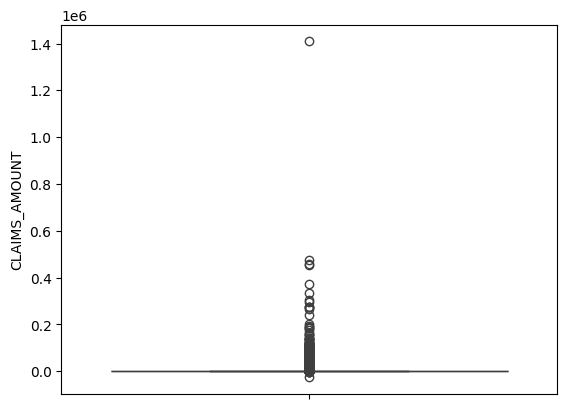

In [ ]:
sns.boxplot(claims_df.CLAIMS_AMOUNT)

In [ ]:
claims_df[claims_df.CLAIMS_AMOUNT > 1_000_000]

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO
77086,202301,202410,RJ,Standard,48378,Z48.8,P1,Married,Saudi Arabia,M,37,I,H. NW7,1409334.0,1


In [ ]:
claims_df.PROV_CODE.value_counts().sort_values(ascending=False)

,count
PROV_CODE,
45342,24921
47622,17904
45160,16244
44388,15385
40176,13872
...,...
47816,1
1860544,1
1851630,1


In [ ]:
preauth_df.PROV_CODE.value_counts().sort_values(ascending=False)

,count
PROV_CODE,
45342,78931
46020,44660
46030,35854
47878,15926
40174,15030
...,...
44018,1
46072,1
43854,1


In [ ]:
providers_df.drop(columns = 'Unnamed: 7', inplace=True)
providers_df[providers_df.PROV_CODE == 45342]

,PROV_CODE,PROV_NAME,PROVIDER_NETWORK,PROVIDER_PRACTICE,PROVIDER_REGION,PROVIDER_TOWN,AREA_CODE
1364,45342,Al Nahdi Medical Company,F. NW5,Pharmacy,Western,Jeddah,W


In [ ]:
claims_df.isnull().sum()

,0
TREATMENT_PERIOD,0
BATCH_PERIOD,0
STATUS,0
BEN_HEAD,413
PROV_CODE,0
DIAG_CODE,0
SERV_TYPE,68707
MARITAL_STATUS,0
NATIONALITY,0
GENDER,0


In [ ]:
preauth_df.isnull().sum()

,0
TREATMENT_PERIOD,0
Treat_Date,0
PROV_CODE,0
CLAIM_TYPE,0
DIAG_CODE,376
BEN_HEAD,922
SERV_TYPE,352106
AGE,0
MARITAL_STATUS,0
Gender,0


In [ ]:
claims_df['IS_DATE_LOGICAL'] = (claims_df.BATCH_PERIOD >= claims_df.TREATMENT_PERIOD).astype(int)
claims_df.IS_DATE_LOGICAL.sum()

np.int64(899510)

In [ ]:
print("NUMBER OF BATCH DATES and TREATMENTS DATA FOR CLAIMS DATASET")
print("\tBATCH DATE IS AFTER TREATMENT DATE: ",np.sum((claims_df.BATCH_PERIOD > claims_df.TREATMENT_PERIOD).astype(int)), " SHOULD BE")
print("\tBATCH DATE IS EQUAL TREATMENT DATE: ",np.sum((claims_df.BATCH_PERIOD == claims_df.TREATMENT_PERIOD).astype(int)), " MIGHT HAPPEN")
print("\tBATCH DATE IS BEFORE TREATMENT DATE: ",np.sum((claims_df.BATCH_PERIOD < claims_df.TREATMENT_PERIOD).astype(int)), " NOT LOGICAL")

NUMBER OF BATCH DATES and TREATMENTS DATA FOR CLAIMS DATASET
	BATCH DATE IS AFTER TREATMENT DATE:  6549  SHOULD BE
	BATCH DATE IS EQUAL TREATMENT DATE:  892961  MIGHT HAPPEN
	BATCH DATE IS BEFORE TREATMENT DATE:  490  NOT LOGICAL


In [ ]:
# 1. Define the conditions
conditions = [
    claims_df['BATCH_PERIOD'] > claims_df['TREATMENT_PERIOD'], # 2
    claims_df['BATCH_PERIOD'] == claims_df['TREATMENT_PERIOD'], # 1
    claims_df['BATCH_PERIOD'] < claims_df['TREATMENT_PERIOD'] # 0
]

# 2. Define the corresponding values for each condition
choices = [2, 1, 0]

# 3. Create the new 'Lag' column using np.select
# The 'default' parameter is a fallback for any rows that don't meet a condition
claims_df['Lag'] = np.select(conditions, choices, default=np.nan)

In [ ]:
claims_df[['Lag', 'CLAIMS_AMOUNT']].groupby('Lag').mean('CLAIMS_AMOUNT').sort_values(by = 'CLAIMS_AMOUNT', ascending=False)

,CLAIMS_AMOUNT
Lag,
2.0,2052.531480
0.0,1227.083000
1.0,309.809611


In [ ]:
claims_df[['STATUS', "CLAIMS_AMOUNT"]].groupby('STATUS').mean('CLAIMS_AMOUNT').sort_values(by='CLAIMS_AMOUNT', ascending=False)

,CLAIMS_AMOUNT
STATUS,
SU,5656.864899
RJ,357.962919
AC,309.646379


In [ ]:
providers_df

,PROV_CODE,PROV_NAME,PROVIDER_NETWORK,PROVIDER_PRACTICE,PROVIDER_REGION,PROVIDER_TOWN,AREA_CODE
0,0,NON PROVIDER SETTLEMENT,X. RBSMNT,Reimbursement,Reimbursement,Reimbursement,966
1,40000,Abuzinadah Hospital,L. NWS,Hospital,Western,Jeddah,W
2,40006,Hamed Specialized Polyclinic,B. NW1,Polyclinic,Southern,Muhayel,S
3,40008,Al Ansar New Polyclinic,J. ONW,Polyclinic,Western,Jeddah,W
4,40010,Al Ansari Specialist Hospital,I. SPA,Hospital,Western,Yanbu Industrial,W
...,...,...,...,...,...,...,...
3359,49450,New Ain Dar PHC - MOH,I. SPA,Polyclinic,Eastern,Buqayq,E
3360,49452,Urayarah PHCA - MOH,I. SPA,Polyclinic,Eastern,Dammam,E
3361,49454,Mulayjah PHC - MOH,I. SPA,Polyclinic,Eastern,Dammam,E
3362,49456,Health center Atiq - MOH,I. SPA,Polyclinic,Eastern,Dammam,E


In [ ]:
full_df = claims_df.join(providers_df[['PROV_CODE', "PROVIDER_PRACTICE", "PROVIDER_REGION", "PROVIDER_TOWN"]].set_index('PROV_CODE'), on = 'PROV_CODE', how = 'left')

In [ ]:
full_df

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO,IS_DATE_LOGICAL,Lag,PROVIDER_PRACTICE,PROVIDER_REGION,PROVIDER_TOWN
0,202301,202209,RJ,Standard,47050,H20.8,ME,Single,Saudi Arabia,M,29,O,F. NW5,135.32,1,0,0.0,Hospital,Central,Riyadh
1,202301,202210,RJ,Standard Chronic,43556,I10,OS,Married,Saudi Arabia,M,73,O,H. NW7,1529.21,1,0,0.0,Hospital,Western,Jeddah
2,202301,202211,RJ,Standard Chronic,47050,H40.2,ME,Single,Saudi Arabia,M,83,O,H. NW7,158.40,1,0,0.0,Hospital,Central,Riyadh
3,202301,202212,AC,Root Canal Three/Four Roots,40154,K02.1,OS,Married,Saudi Arabia,F,22,O,G. NW6,848.66,1,0,0.0,Hospital,Western,Jeddah
4,202301,202212,AC,Standard,40302,L23,ME,Single,Saudi Arabia,M,14,O,H. NW7,86.96,1,0,0.0,Hospital,Eastern,Jubail Industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,202312,202406,RJ,Standard,41260,R52.9,OS,Single,Saudi Arabia,M,8,O,G. NW6,508.61,1,1,2.0,Hospital,Western,Jeddah
899996,202312,202407,AC,Standard,40040,J18.0,P2,Married,Saudi Arabia,F,68,I,H. NW7,523.92,1,1,2.0,Hospital,Western,Jeddah
899997,202312,202408,AC,Medication (Dental),46604,K02,P2,Single,Bahrain,F,20,O,H. NW7,236.31,1,1,2.0,Dental,Overseas,Manama
899998,202312,202411,RJ,Standard Congenital,48378,Q99.1,P1,Single,Saudi Arabia,M,16,I,H. NW7,998.59,1,1,2.0,Data Only,Overseas,U.S.A


In [ ]:
full_df[['PROVIDER_TOWN', 'CLAIMS_AMOUNT']].groupby('PROVIDER_TOWN').mean("CLAIMS_AMOUNT").sort_values(by='CLAIMS_AMOUNT', ascending=False).head(10)

,CLAIMS_AMOUNT
PROVIDER_TOWN,
U.S.A,51629.225789
Germany,47584.645000
London,12574.862772
Pakistan,5306.452000
"Dubai, UAE",1248.475048
Kuwait,1079.240601
Sharja,726.122857
Amman,613.862151
Jubail Industrial,581.567013


In [ ]:
full_df.PROVIDER_TOWN.value_counts().sort_values(ascending=False).head(10)

,count
PROVIDER_TOWN,
Riyadh,291398
Jeddah,228141
Khobar,62883
Dammam,48915
Jubail Industrial,23988
Al Hasa,23552
Makkah,21446
Madinah,19511
Jubail,18555


In [ ]:
full_df[['PROVIDER_REGION', 'CLAIMS_AMOUNT']].groupby('PROVIDER_REGION').mean("CLAIMS_AMOUNT").sort_values(by='CLAIMS_AMOUNT', ascending=False)

,CLAIMS_AMOUNT
PROVIDER_REGION,
Overseas,1931.363412
Eastern,366.534317
Central,338.598728
Western,273.754778
Southern,245.977527
Northern,130.025314


In [ ]:
full_df[['PROVIDER_PRACTICE', 'CLAIMS_AMOUNT']].groupby('PROVIDER_PRACTICE').mean("CLAIMS_AMOUNT").sort_values(by='CLAIMS_AMOUNT', ascending=False)

,CLAIMS_AMOUNT
PROVIDER_PRACTICE,
Data Only,19647.149012
Long Term Care,10947.130000
Hearing Aid,4909.229167
Speech Center,3234.258148
Dialysis Center,2712.919286
Cardiac Center,2226.009490
Home Healthcare,1802.395701
Radiology,1682.673913
Physiotherapy Center,1548.825902


In [ ]:
full_df[full_df.CLAIMS_AMOUNT > 200_000].sort_values(by='CLAIMS_AMOUNT', ascending=False)

,TREATMENT_PERIOD,BATCH_PERIOD,STATUS,BEN_HEAD,PROV_CODE,DIAG_CODE,SERV_TYPE,MARITAL_STATUS,NATIONALITY,GENDER,AGE,CLAIM_TYPE,PLAN_NETWORK,CLAIMS_AMOUNT,COUNT_DISTINCT_of_VOU_NO,IS_DATE_LOGICAL,Lag,PROVIDER_PRACTICE,PROVIDER_REGION,PROVIDER_TOWN
77086,202301,202410,RJ,Standard,48378,Z48.8,P1,Married,Saudi Arabia,M,37,I,H. NW7,1409334.00,1,1,2.0,Data Only,Overseas,U.S.A
500462,202307,202311,RJ,Standard Chronic,48122,N64,NaN,Married,Australia,F,55,I,H. NW7,475312.89,1,1,2.0,Data Only,Overseas,London
366183,202305,202404,AC,Standard,48378,S02.0,P1,Single,Canada,M,17,I,H. NW7,457069.99,2,1,2.0,Data Only,Overseas,U.S.A
484015,202307,202307,RJ,Pre-employment,40302,Z00.4,NaN,Single,Saudi Arabia,M,33,O,H. NW7,456000.00,208,1,1.0,Hospital,Eastern,Jubail Industrial
500471,202307,202406,AC,Standard Congenital,43538,G80.9,P2,Single,Saudi Arabia,M,12,I,F. NW5,373500.00,1,1,2.0,Hospital,Western,Madinah
500369,202307,202308,RJ,Standard Chronic,48122,J34.3,NaN,Single,Canada,F,20,I,H. NW7,334557.66,1,1,2.0,Data Only,Overseas,London
123530,202302,202302,AC,Standard Chronic,45160,I64,P1,Single,Saudi Arabia,M,78,I,H. NW7,304248.00,1,1,1.0,Hospital,Central,Riyadh
72381,202301,202301,RJ,Standard Chronic,43556,I64,OS,Married,Saudi Arabia,F,76,I,H. NW7,293944.31,1,1,1.0,Hospital,Western,Jeddah
814040,202311,202407,SU,Standard Chronic,46828,K59.1,P1,Married,Saudi Arabia,F,62,I,D. NW3,276605.65,1,1,2.0,Hospital,Central,Unayzah
494851,202307,202307,RJ,Standard Chronic,43556,J96,OS,Married,Saudi Arabia,M,64,I,H. NW7,275086.08,1,1,1.0,Hospital,Western,Jeddah


In [ ]:
df = pd.read_parquet('final_claims_dataset.parquet')
df

OSError: Corrupt snappy compressed data.

In [ ]:
full_df.isnull().sum()

,0
TREATMENT_PERIOD,0
BATCH_PERIOD,0
STATUS,0
BEN_HEAD,413
PROV_CODE,0
DIAG_CODE,0
SERV_TYPE,68707
MARITAL_STATUS,0
NATIONALITY,0
GENDER,0


In [ ]:
providers_df.PROVIDER_PRACTICE.value_counts()

,count
PROVIDER_PRACTICE,
Polyclinic,1315
Hospital,601
Dental,356
In-house Clinic,293
Clinic,230
Optical,126
Data Only,113
Home Healthcare,61
Physiotherapy Center,43
